In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

In [3]:
with open('Run2.pkl', 'rb') as file:
    # Load the data from the pickle file
    din = pickle.load(file)

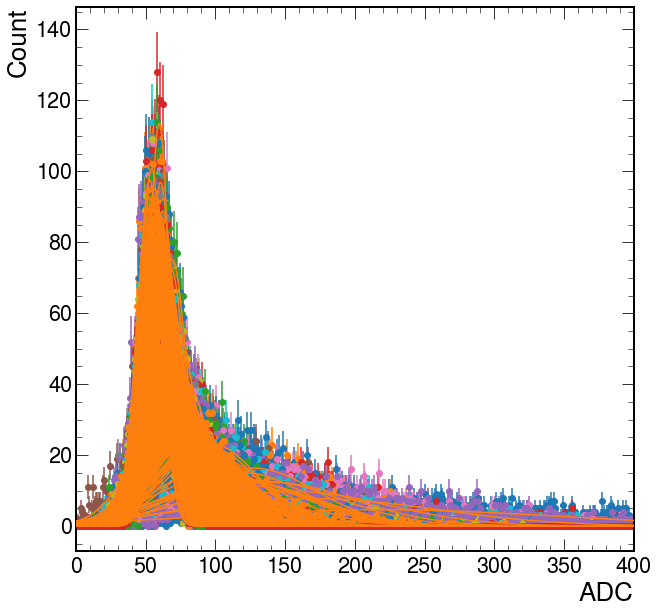

In [4]:
HGPeds = []
HGPedStd = []
HGPedsErr = []
HGPedStdErr = []

problems=[]
num_channels = 25
start = 0

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.bbox'] = 'tight'
hep.style.use(hep.style.CMS)

def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((data - y)**2)

#Defining the Gaussian function to fit to. 
#A is the amplitude, mu is the pedestal mean value, sigma is the pedestal standard deviation
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Determine the grid size
num_cols = 5
num_rows = (num_channels + num_cols - 1) // num_cols
num_rows=5
# Create a figure and grid of subplots
# Plot histogram for each channel

for i in range(64*6):
    channel_key = f"{i}_HG"
    data = np.array(din[channel_key])
    HG_mask=np.array(data)<400
    HG_branch_filtered=data[HG_mask]
    data = HG_branch_filtered
    bins = int(np.sqrt(len(data)))
    counts, bin_edges = np.histogram(data[data>0], bins=400,range=[0,400])
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    errors = np.sqrt(counts)
    bin_centers = np.array(bin_centers)
    counts = np.array(counts)


    # Plot the histogram with error bars and the KDE
    plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', label=f'Ch {i}')
    
    mask = (counts > 0)

    initial_params = [max(counts[mask]),np.mean(data),np.std(data)]
    m = Minuit(LeastSquares(bin_centers[mask], counts[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    x = np.linspace(0,1000, 1500)
    plt.xlim(0,400)

    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    plt.plot(x, y_fit, color='tab:orange', zorder=101)
    HGPeds.append(mu_fit)
    HGPedStd.append(sigma_fit)
    HGPedsErr.append(errors['mu'])
    HGPedStdErr.append(errors['sigma'])
    
    plt.ylabel('Count')
    plt.xlabel('ADC')

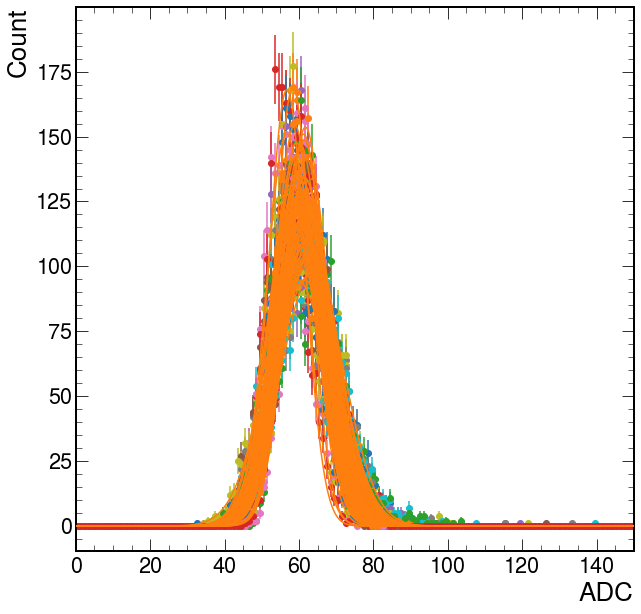

In [5]:
LGPeds = []
LGPedStd = []
LGPedsErr = []
LGPedStdErr = []

problems=[]
num_channels = 25
start = 0

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.bbox'] = 'tight'
hep.style.use(hep.style.CMS)


for i in range(64*1):
    channel_key = f"{i}_LG"
    data = np.array(din[channel_key])
    LG_mask=np.array(data)<150
    LG_branch_filtered=data[LG_mask]
    data = LG_branch_filtered
    bins = int(np.sqrt(len(data)))
    counts, bin_edges = np.histogram(data[data>0], bins=150,range=[0,150])
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    errors = np.sqrt(counts)
    bin_centers = np.array(bin_centers)
    counts = np.array(counts)


    # Plot the histogram with error bars and the KDE
    plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', label=f'Ch {i}')
    
    mask = (counts > 0)

    initial_params = [max(counts[mask]),np.mean(data),np.std(data)]
    m = Minuit(LeastSquares(bin_centers[mask], counts[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    x = np.linspace(0,150, 1500)
    plt.xlim(0,150)

    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    plt.plot(x, y_fit, color='tab:orange', zorder=101)
    LGPeds.append(mu_fit)
    LGPedStd.append(sigma_fit)
    LGPedsErr.append(errors['mu'])
    LGPedStdErr.append(errors['sigma'])
    
    plt.ylabel('Count')
    plt.xlabel('ADC')

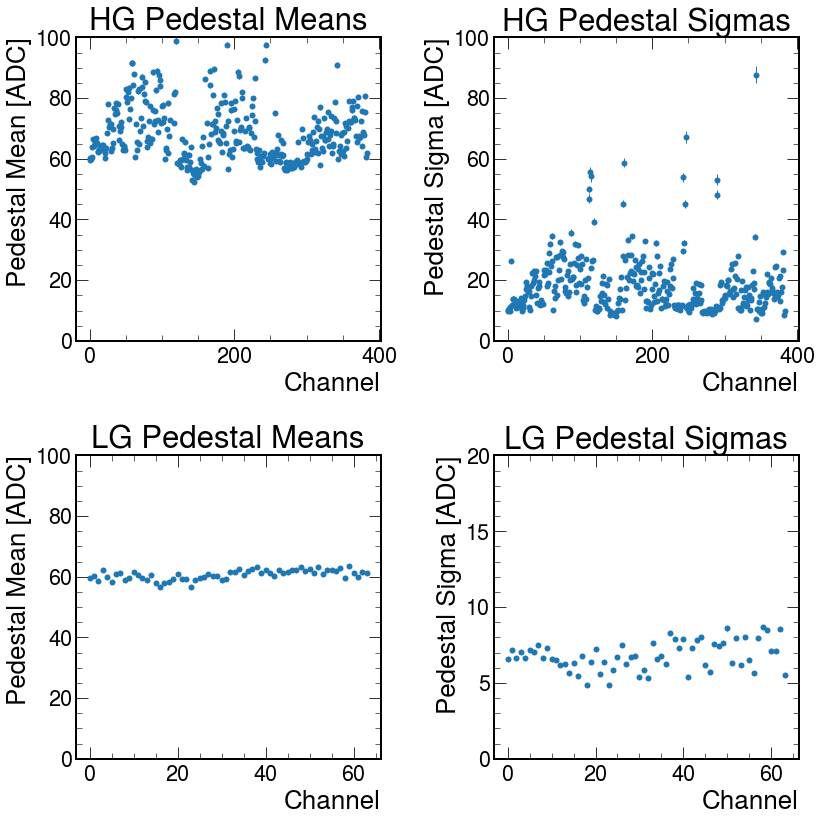

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Create 2x2 grid of subplots

# Top left: HG Pedestal Means
axs[0, 0].errorbar(x=range(len(HGPeds)), y=HGPeds, yerr=HGPedsErr, fmt='o', capsize=0, elinewidth=1, markeredgewidth=0)
axs[0, 0].set_ylim(0, 100)
axs[0, 0].set_title("HG Pedestal Means")
axs[0, 0].set_xlabel("Channel")
axs[0, 0].set_ylabel("Pedestal Mean [ADC]")

# Top right: HG Pedestal Sigmas
axs[0, 1].errorbar(x=range(len(HGPedStd)), y=HGPedStd, yerr=HGPedStdErr, fmt='o', capsize=0, elinewidth=1, markeredgewidth=0)
axs[0, 1].set_ylim(0, 100)
axs[0, 1].set_title("HG Pedestal Sigmas")
axs[0, 1].set_xlabel("Channel")
axs[0, 1].set_ylabel("Pedestal Sigma [ADC]")

# Bottom left: LG Pedestal Means
axs[1, 0].errorbar(x=range(len(LGPeds)), y=LGPeds, yerr=LGPedsErr, fmt='o', capsize=0, elinewidth=1, markeredgewidth=0)
axs[1, 0].set_ylim(0, 100)
axs[1, 0].set_title("LG Pedestal Means")
axs[1, 0].set_xlabel("Channel")
axs[1, 0].set_ylabel("Pedestal Mean [ADC]")

# Bottom right: LG Pedestal Sigmas
axs[1, 1].errorbar(x=range(len(LGPedStd)), y=LGPedStd, yerr=LGPedStdErr, fmt='o', capsize=0, elinewidth=1, markeredgewidth=0)
axs[1, 1].set_ylim(0, 20)
axs[1, 1].set_title("LG Pedestal Sigmas")
axs[1, 1].set_xlabel("Channel")
axs[1, 1].set_ylabel("Pedestal Sigma [ADC]")

plt.tight_layout()
plt.show()

In [7]:
pedestal_data = {
    'HGPedMean': HGPeds,
    'HGPedSigma': HGPedStd,
    'LGPedMean': LGPeds,
    'LGPedSigma': LGPedStd
}

# Save to a .pkl file
with open('pedestal_data.pkl', 'wb') as f:
    pickle.dump(pedestal_data, f)